In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
present_data = pd.read_csv("data/application_data.csv")

In [3]:
present_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
previous_data = pd.read_csv("data/previous_application.csv")

In [5]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
present_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
present_data.isnull().sum().sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [9]:
# Dropping columns with more than 40% of null values
present_df = present_data.drop(columns = present_data.columns[present_data.isnull().sum()/present_data.shape[0]>.3],axis =1)

In [10]:
present_df.isnull().sum().sort_values(ascending = False)

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
Length: 72, dtype: int64

## Many columns with null values are still present which need to be removed or imputed

In [11]:
present_df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [12]:
present_df.drop(labels = 'EXT_SOURCE_3',axis =1,inplace = True)

In [13]:
present_df.isnull().sum().sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 71, dtype: int64

In [14]:
present_df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [15]:
present_df.drop(labels = 'AMT_REQ_CREDIT_BUREAU_YEAR',axis =1,inplace = True)

In [16]:
present_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [17]:
present_df['AMT_REQ_CREDIT_BUREAU_QRT'] = present_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.0)

In [18]:
present_df['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [19]:
present_df['AMT_REQ_CREDIT_BUREAU_MON'] = present_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.0)

In [20]:
present_df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [21]:
present_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = present_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.0)

In [22]:
present_df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [23]:
present_df['AMT_REQ_CREDIT_BUREAU_DAY'] = present_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.0)

In [24]:
present_df.isnull().sum().sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
                               ...  
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
AMT_REQ_CREDIT_BUREAU_QRT          0
Length: 70, dtype: int64

In [25]:
present_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [26]:
present_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = present_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0)

In [27]:
na_columns = present_df.isnull().sum().sort_values(ascending = False)

In [28]:
present_df.loc[present_df['NAME_TYPE_SUITE'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,...,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306273,454852,0,Revolving loans,M,N,Y,2,67500.0,202500.0,10125.0,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
306544,455158,0,Cash loans,F,N,N,0,180000.0,894825.0,23602.5,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
306615,455245,0,Cash loans,M,N,N,0,180000.0,225000.0,8469.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
306636,455270,0,Cash loans,M,Y,N,2,189000.0,677664.0,21406.5,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0


In [29]:
present_df.dropna(subset = 'NAME_TYPE_SUITE',axis =0,inplace = True)

In [30]:
present_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
count,306219.000000,306219.000000,306219.000000,3.062190e+05,3.062190e+05,306207.000000,3.062190e+05,306219.000000,306219.000000,306219.000000,...,306219.000000,306219.000000,306219.000000,306219.000000,306219.000000,306219.000000,306219.000000,306219.000000,306219.000000,306219.000000
mean,278163.506533,0.080841,0.417009,1.687832e+05,5.987971e+05,27122.117024,5.379464e+05,0.020865,-16040.601468,63858.080573,...,0.000261,0.007818,0.000571,0.000493,0.000330,0.005525,0.006038,0.029789,0.231432,0.229767
std,102786.857316,0.272591,0.722107,2.375164e+05,4.019588e+05,14490.836220,3.689178e+05,0.013830,4362.862329,141312.849258,...,0.016161,0.088073,0.023899,0.022201,0.018158,0.077950,0.102765,0.190804,0.856379,0.744693
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189129.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19685.000000,-2761.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278183.000000,0.000000,0.000000,1.476000e+05,5.135310e+05,24930.000000,4.500000e+05,0.018850,-15756.000000,-1214.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367125.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12418.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000


In [31]:
present_df.isnull().sum().sort_values(ascending = False)

OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OBS_60_CNT_SOCIAL_CIRCLE      1021
DEF_60_CNT_SOCIAL_CIRCLE      1021
EXT_SOURCE_2                   659
                              ... 
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
AMT_REQ_CREDIT_BUREAU_QRT        0
Length: 70, dtype: int64

In [32]:
present_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    305198.000000
mean          1.421569
std           2.400906
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [33]:
present_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163255
1.0       48585
2.0       29678
3.0       20226
4.0       14069
5.0        9514
6.0        6427
7.0        4365
8.0        2944
9.0        1996
10.0       1371
11.0        849
12.0        647
13.0        408
14.0        258
15.0        164
16.0        133
17.0         87
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [34]:
present_df['OBS_30_CNT_SOCIAL_CIRCLE'] = present_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.0)

In [35]:
present_df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    305198.000000
mean          0.143389
std           0.446692
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [36]:
present_df['DEF_30_CNT_SOCIAL_CIRCLE'] = present_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0)

In [37]:
present_df.dropna(subset = ['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis =0,inplace = True)

In [38]:
present_df.isnull().sum().sort_values(ascending = False)

EXT_SOURCE_2                  655
AMT_ANNUITY                    12
DAYS_LAST_PHONE_CHANGE          1
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_8                 0
                             ... 
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
AMT_REQ_CREDIT_BUREAU_QRT       0
Length: 70, dtype: int64

In [39]:
present_df.dropna(axis = 0,inplace = True)

In [40]:
present_df.shape

(304531, 70)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_GOODS_PRICE'>

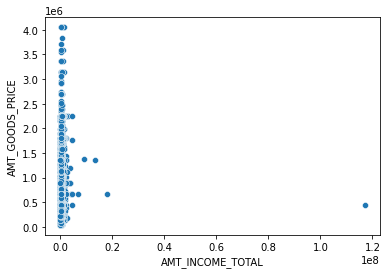

In [41]:
sns.scatterplot(data = present_df,y = 'AMT_GOODS_PRICE' ,x = 'AMT_INCOME_TOTAL')

In [42]:
present_df['AMT_INCOME_TOTAL'].mean()

168663.44631411906

In [43]:
present_df['AMT_INCOME_TOTAL'].mode()

0    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
present_df['AMT_INCOME_TOTAL'].max()

117000000.0

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

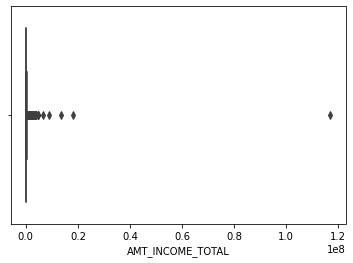

In [45]:
sns.boxplot(data = present_data,x = "AMT_INCOME_TOTAL")

In [46]:
present_df.loc[present_df['AMT_INCOME_TOTAL']==117000000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [47]:
present_df['TARGET'].value_counts()

0    279864
1     24667
Name: TARGET, dtype: int64

## I have observed that a few clients have an income that is a lot higher than the income of any other client and the other attributes like AMT_CREDIT or AMT_GOODS_PRICE also don't have any visible relation with the huge amount. So I will remove it as it is an outlier.

In [48]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==117000000.0].index,axis = 0,inplace = True)

In [49]:
present_df['AMT_INCOME_TOTAL'].max()

18000090.0

In [50]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==18000090.0].index,axis = 0,inplace = True)

In [51]:
present_df['AMT_INCOME_TOTAL'].max()

13500000.0

In [52]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==13500000.0].index,axis = 0,inplace = True)

In [53]:
present_df['AMT_INCOME_TOTAL'].max()

9000000.0

In [54]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==9000000.0].index,axis = 0,inplace = True)

In [55]:
present_df['AMT_INCOME_TOTAL'].max()

6750000.0

In [56]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==6750000.0].index,axis = 0,inplace = True)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

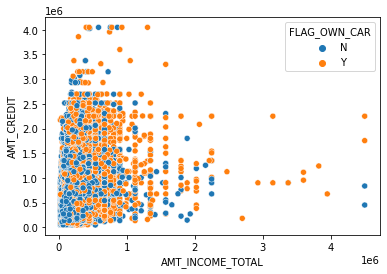

In [57]:
sns.scatterplot(data = present_df,y = 'AMT_CREDIT' ,x = 'AMT_INCOME_TOTAL',hue = 'FLAG_OWN_CAR')

In [59]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
present_data.shape

(307511, 122)

In [65]:
present_data.loc[present_data['SK_ID_CURR'].isin(previous_data['SK_ID_CURR'])]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
